# Airbnb in New York City - an explorative data analysis

On todays session we want to analyze the Airbnb offer in New York City using and improving our already learned knowledge about data science!

<img src="./_img/NYC_2.jpg"> 

For this tutorial the following commands will be very helpful:

| commands | meaning |
| :-: | :-: |
| `pd.read_csv(<path>)` | Reading a .csv-File from your file System | 
| `len()` | return the length of an input object, for example the row count of an pandas dataframe | 
| `df.columns()` | returns the column names of a dataframe |
| `df.head(<n>)` | returns the first n rows of a dataframe | 
| `df.tail(<n>)` | returns the last n rows of a dataframe | 
| `df.loc[<index>]` | locator to filter a dataframe | 
| `df["<column_name>"]` | filter a dataframe to a given column / return only the specified column of a dataframe | 
| `df.sample(<n>)` | picks randomly n rows out of a dataframe | 
| `df.shape()` | returns the dimensions of a dataframe | 
| `df.unique()` | returns the unique values for each column of a dataframe |  
| `df.groupby("<column_name>")` | groups the information of a dataframe by the specified column | 
| `df.groupby("<column_name>").size()` | return the number of observation in each group | 
| `df.groupby("<column_name>").sort_values()` | sort the output by values, may based on a specified column | 
| `df.groupby("<column_name>").xs("<column_name>")` | extract a specific value set out of a grouped information which consists out of a multi level index | 
| `series.mean()` | calculates the mean value based on the given information list | 
| `df.describe()` | returns a statistical description for all columns of a given dataframe | 

## Loading packages and dataset

In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
airbnb_NY = pd.read_csv("../data/Airbnb_NYC.csv")

## Get to know the dataset

> **Question 1A)** How many observations yields the dataset?

In [22]:
airbnb_NY.index

RangeIndex(start=0, stop=38733, step=1)

In [23]:
len(airbnb_NY)

38733

In [24]:
airbnb_NY.shape

(38733, 10)

> **Question 1B)** What columns are included in the dataset?

In [25]:
airbnb_NY.columns

Index(['Boroughs', 'Latitude', 'Longitude', 'Prop_Type', 'Min_Nights',
       'Host_Listing_Cnt', 'Days_Available', 'Review_Cnt', 'Reviews30d',
       'Price'],
      dtype='object')

Okay, now let's get a quick overview:

> **Question 2A)** show the first 10 observations of the dataset!

In [27]:
airbnb_NY.head(10)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0
5,Bronx,40.80247,-73.91435,EntireHome,2.0,1.0,300,157,3.29,90.0
6,Bronx,40.80270,-73.91563,EntireHome,2.0,3.0,50,14,3.89,109.0
7,Bronx,40.80273,-73.91519,EntireHome,4.0,3.0,134,11,3.40,115.0
8,Bronx,40.80408,-73.92270,EntireHome,2.0,1.0,125,6,0.80,175.0
9,Bronx,40.80461,-73.92276,PrivateRoom,3.0,2.0,248,86,1.12,60.0


> **Question 2B)** show the last 15 observations of the dataset!

In [28]:
airbnb_NY.tail(15)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
38718,Staten Island,40.64535,-74.09255,PrivateRoom,3.0,2.0,55,2,1.40,54.0
38719,Staten Island,40.64537,-74.08381,PrivateRoom,2.0,1.0,355,79,3.81,100.0
38720,Staten Island,40.64553,-74.08323,EntireHome,3.0,1.0,213,108,1.75,195.0
38721,Staten Island,40.64567,-74.08368,EntireHome,4.0,2.0,53,122,2.58,78.0
38722,Staten Island,40.64579,-74.08027,PrivateRoom,4.0,6.0,158,62,2.73,29.0
38723,Staten Island,40.64591,-74.08399,EntireHome,1.0,1.0,318,115,5.49,125.0
38724,Staten Island,40.64594,-74.08342,PrivateRoom,30.0,4.0,365,52,0.80,169.0
38725,Staten Island,40.64596,-74.08059,EntireHome,4.0,6.0,115,99,3.41,65.0
38726,Staten Island,40.64601,-74.08304,PrivateRoom,30.0,4.0,0,87,1.35,69.0
38727,Staten Island,40.64605,-74.07897,EntireHome,4.0,6.0,247,2,0.15,289.0


> **Question 2C)** choose randomly 15 observations out of the dataset and show them!

In [31]:
airbnb_NY.sample(15, random_state=42)

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
35463,Queens,40.73399,-73.87351,EntireHome,3.0,3.0,129,2,0.57,150.0
21261,Manhattan,40.73036,-73.98633,PrivateRoom,30.0,1.0,244,7,0.19,95.0
23180,Manhattan,40.74418,-73.97565,PrivateRoom,3.0,2.0,0,2,0.05,70.0
3944,Brooklyn,40.66430,-73.95196,PrivateRoom,1.0,1.0,1,214,5.02,97.0
30694,Manhattan,40.80549,-73.95129,PrivateRoom,1.0,2.0,0,3,0.25,83.0
1557,Brooklyn,40.63189,-74.02322,EntireHome,1.0,1.0,276,19,3.90,135.0
2858,Brooklyn,40.65235,-73.95347,PrivateRoom,1.0,5.0,172,14,4.33,54.0
22957,Manhattan,40.74268,-73.97853,EntireHome,1.0,1.0,307,67,0.88,240.0
34523,Queens,40.69649,-73.90564,PrivateRoom,1.0,12.0,108,21,1.42,55.0
20458,Manhattan,40.72703,-73.99264,EntireHome,5.0,1.0,0,2,0.38,189.0


> **Question 2D)** like C) but only the borough, property type and the price should be shown

In [35]:
airbnb_NY[ ["Boroughs", "Prop_Type", "Price"] ].sample(15, random_state=42)

,Boroughs,Prop_Type,Price
35463,Queens,EntireHome,150.0
21261,Manhattan,PrivateRoom,95.0
23180,Manhattan,PrivateRoom,70.0
3944,Brooklyn,PrivateRoom,97.0
30694,Manhattan,PrivateRoom,83.0
1557,Brooklyn,EntireHome,135.0
2858,Brooklyn,PrivateRoom,54.0
22957,Manhattan,EntireHome,240.0
34523,Queens,PrivateRoom,55.0
20458,Manhattan,EntireHome,189.0


## The spatial context matters

Let's take a deeper look on the dataset

> **Question 3A)** Which boroughs of NYC are covered by the dataset?

In [36]:
airbnb_NY["Boroughs"].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

> **Question 3B)** Which different kind of accomodations exists?

In [37]:
airbnb_NY["Prop_Type"].unique()

array(['PrivateRoom', 'EntireHome', 'SharedRoom'], dtype=object)

> **Question 3C)** How many airbnb offers exists per borough?

In [40]:
airbnb_NY.groupby("Boroughs")["Latitude"].count()

Boroughs
Bronx              891
Brooklyn         16436
Manhattan        16383
Queens            4695
Staten Island      328
Name: Latitude, dtype: int64

> **Question 3D)** Order the output from C) by the count of offers!

In [41]:
output = airbnb_NY.groupby("Boroughs")["Latitude"].count()

In [43]:
output.sort_values(ascending=False)

Boroughs
Brooklyn         16436
Manhattan        16383
Queens            4695
Bronx              891
Staten Island      328
Name: Latitude, dtype: int64

> **Question 3E)** Refine your search: how is the type of property influenced by the boroughs? Provide a table view!

In [45]:
airbnb_NY.groupby(["Boroughs", "Prop_Type"]).size().unstack()

Prop_Type,EntireHome,PrivateRoom,SharedRoom
Boroughs,,,
Bronx,308,532,51
Brooklyn,8163,7992,281
Manhattan,9776,6258,349
Queens,1770,2772,153
Staten Island,156,166,6


In [48]:
airbnb_NY.groupby(["Boroughs","Prop_Type"]).size().unstack(level=0)

Prop_Type,EntireHome,PrivateRoom,SharedRoom
Boroughs,,,
Bronx,308,532,51
Brooklyn,8163,7992,281
Manhattan,9776,6258,349
Queens,1770,2772,153
Staten Island,156,166,6


> **Question 3F)** Provide a plot to visualize E) 
hint: try at first to provide a barplot only for Bronx and afterwars for all boroughs at the same time)

<AxesSubplot:xlabel='Boroughs'>

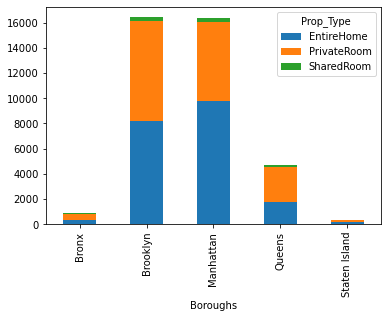

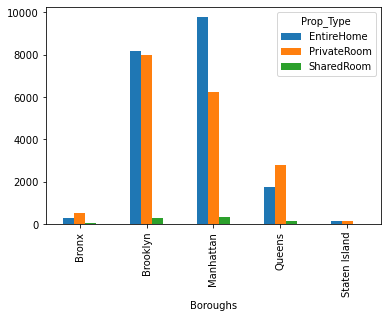

In [61]:
df = airbnb_NY.groupby(["Boroughs","Prop_Type"]).size().unstack().copy()

fig_1, ax_1 = plt.subplots()
df.plot.bar(ax = ax_1, stacked=True)

fig_2, ax_2 = plt.subplots()
df.plot.bar(ax = ax_2)

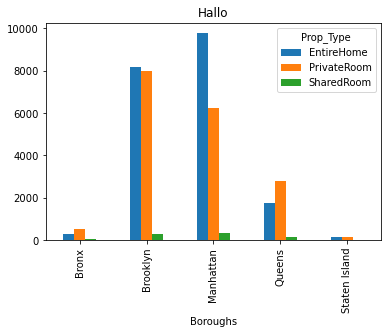

In [64]:
ax_2.set_title("Hallo")
fig_2

In [54]:
df

Prop_Type,EntireHome,PrivateRoom,SharedRoom
Boroughs,,,
Bronx,308,532,51
Brooklyn,8163,7992,281
Manhattan,9776,6258,349
Queens,1770,2772,153
Staten Island,156,166,6


## What about the prices?

> **Question 4A)** Which is the most expensive AirBnB?

In [66]:
airbnb_NY.loc[airbnb_NY["Price"] == airbnb_NY["Price"].max()]

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
17131,Brooklyn,40.7326,-73.95739,EntireHome,5.0,1.0,0,5,0.16,10000.0
37908,Queens,40.7681,-73.91651,PrivateRoom,100.0,1.0,0,2,0.04,10000.0


> **Question 4B)** How many airbnb exists that are in price less than 50 $?

In [69]:
airbnb_NY.loc[airbnb_NY["Price"] < 50].shape

(3994, 10)

> **Question 4C)** Refining B) in which borough are most of them located?

In [75]:
df = airbnb_NY.loc[airbnb_NY["Price"] < 50].copy()
display(df.groupby("Boroughs").size())
gb = df.groupby("Boroughs").size()

gb.loc[gb == gb.max()]

Boroughs
Bronx             269
Brooklyn         2110
Manhattan         550
Queens            982
Staten Island      83
dtype: int64

Boroughs
Brooklyn    2110
dtype: int64

> **Question 4D)** Take a closer look at C): provide a ranking of the mean Review-count of these airbnbs per borough!

In [78]:
df.groupby(["Boroughs"])["Review_Cnt"].mean().sort_values()

Boroughs
Brooklyn         21.005213
Manhattan        23.112727
Bronx            29.866171
Queens           34.489817
Staten Island    38.144578
Name: Review_Cnt, dtype: float64

## Statistics count!

> **Question 5A**) What is the mean cost of an airbnb in NYC?

> **Question 5B)** How does the price vary?

> **Question 5C)** How is the price changing according to the property type? which property type the less expansive one?

> **Question 5D)** how does the mean airbnb price is changing according to the boroughs?

> **Question 5E)** Which are top 10 rated airbnb per borough? calculate the mean price of them!